In [ ]:
# !pip install networkx
# !pip install matplotlib
# !pip install tqdm
# !pip install pandas
# !pip install numpy
# !pip install graphviz
# !pip install scikit-learn

# Task 1. Algorithm's analysis

In [ ]:
import random
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations, groupby

from networkx.algorithms import tree
from networkx.algorithms import bellman_ford_predecessor_and_distance
from networkx.algorithms import floyd_warshall_predecessor_and_distance

import numpy.typing as npt

### Generating graph

In [ ]:

# You can use this function to generate a random graph with 'num_of_nodes'
# nodes and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi
    graph, but enforcing that the resulting graph is conneted
    (in case of undirected graphs)
    """


    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))

    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)

    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)

    if draw:
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue',
                    with_labels=True,
                    node_size=500,
                    arrowsize=20,
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)

        else:
            nx.draw(G, node_color='lightblue',
                with_labels=True,
                node_size=500)

    return G

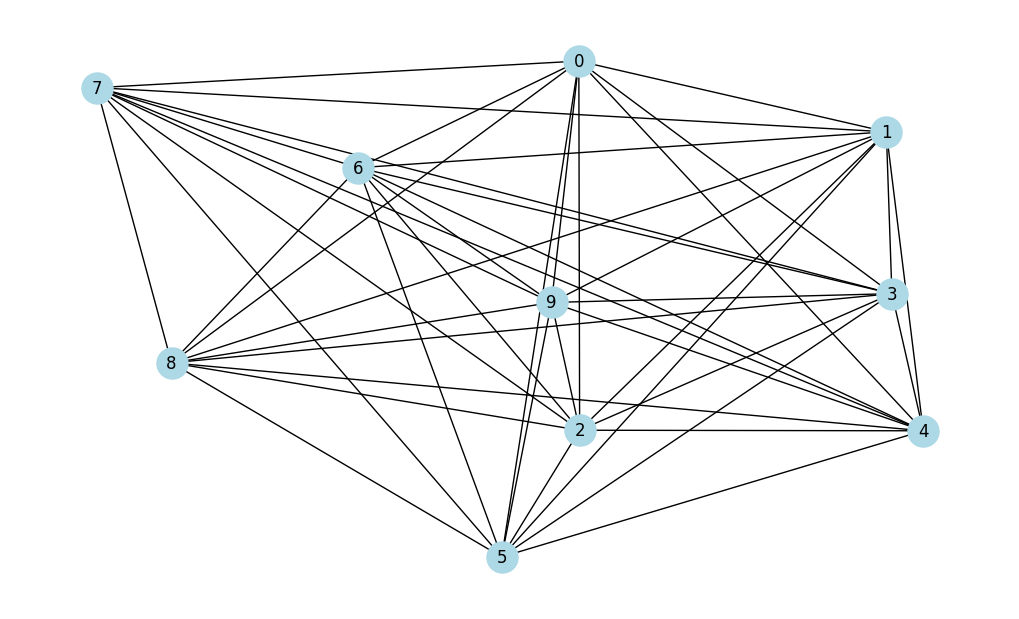

In [ ]:
G = gnp_random_connected_graph(10, 1, False, True)

## Subtask 1.1 (1 point)

### Kruskal's algorithm

#### nx implementation

In [ ]:
mstk = tree.minimum_spanning_tree(G, algorithm="kruskal")

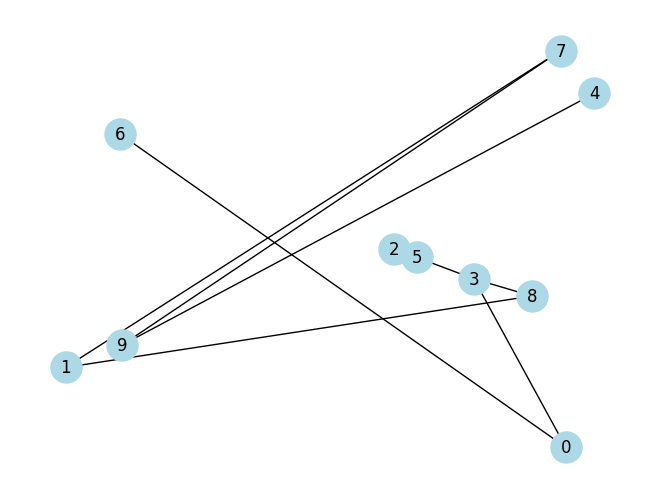

In [ ]:
nx.draw(mstk, node_color='lightblue',
        with_labels=True,
        node_size=500)

In [ ]:
mstk.edges(), len(mstk.edges())

(EdgeView([(0, 6), (0, 3), (1, 8), (1, 7), (2, 5), (3, 5), (3, 8), (4, 9), (7, 9)]),
 9)

#### Your implementation

In [ ]:
# code here

#### Additional point (+0.5)

Use DSU (disjoint set union) in implementation of the algorithm

### Prim's algorithm

#### nx implementation

In [ ]:
mstp = tree.minimum_spanning_tree(G, algorithm="prim")

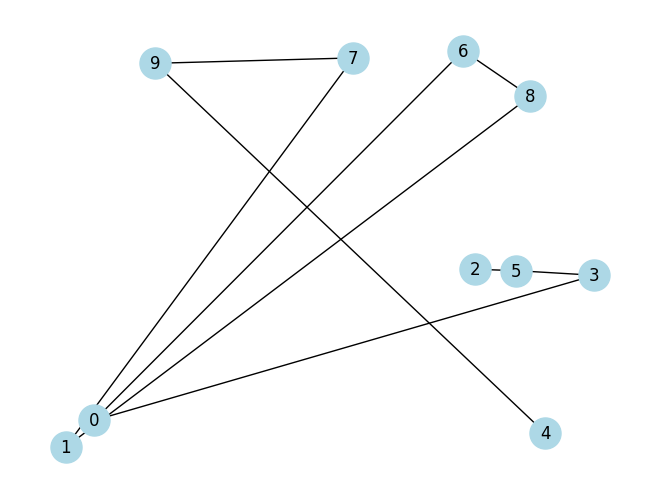

In [ ]:
nx.draw(mstp, node_color='lightblue',
        with_labels=True,
        node_size=500)

In [ ]:
mstp.edges(), len(mstp.edges())

(EdgeView([(0, 6), (0, 3), (1, 8), (1, 7), (2, 5), (3, 5), (4, 9), (6, 8), (7, 9)]),
 9)

#### Your implementation

In [ ]:
# code here

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Subtask 1.2 (1 point)

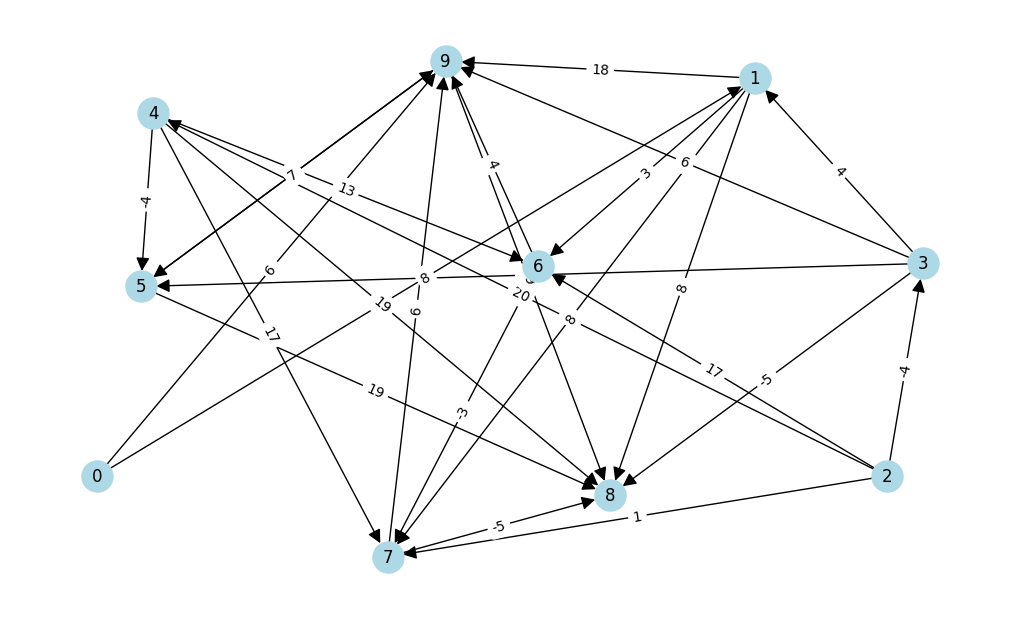

In [ ]:
G = gnp_random_connected_graph(10, 0.5, True, True)

### Bellman-Ford algorithm

#### nx implementation

In [ ]:
# pred is a dictionary of predecessors, dist is a dictionary of distances
try:
    pred, dist = bellman_ford_predecessor_and_distance(G, 0)
    for k, v in dist.items():
        print(f"Distance to {k}:", v)
except:
    print("Negative cycle detected")

Negative cycle detected


#### Your implementation

### Floyd-Warshall algorithm

#### nx implementation

In [ ]:
# pred is a dictionary of predecessors, dist is a dictionary of distances dictionaries
try:
    pred, dist = floyd_warshall_predecessor_and_distance(G)
    for k, v in dist.items():
        print(f"Distances with {k} source:", dict(v))
except:
    print("Negative cycle detected")

Distances with 0 source: {0: -10758, 2: -10763, 1: -10762, 3: -10753, 4: -10759, 5: -10769, 6: -10799, 7: -10987, 8: -12109, 9: -18839}
Distances with 1 source: {1: -10766, 0: -10762, 2: -10767, 3: -10757, 4: -10763, 5: -10773, 6: -10803, 7: -10991, 8: -12113, 9: -18843}
Distances with 2 source: {2: -10768, 0: -10763, 1: -10767, 7: -10992, 3: -10758, 4: -10764, 5: -10774, 6: -10804, 8: -12114, 9: -18844}
Distances with 3 source: {3: -10748, 0: -10753, 1: -10757, 2: -10758, 4: -10754, 5: -10764, 6: -10794, 7: -10982, 8: -12104, 9: -18834}
Distances with 4 source: {4: -10760, 0: -10759, 1: -10763, 2: -10764, 3: -10754, 9: -18840, 5: -10770, 6: -10800, 7: -10988, 8: -12110}
Distances with 5 source: {5: -10780, 0: -10769, 1: -10773, 2: -10774, 3: -10764, 4: -10770, 9: -18850, 6: -10810, 7: -10998, 8: -12120}
Distances with 6 source: {6: -10840, 0: -10799, 1: -10803, 2: -10804, 3: -10794, 4: -10800, 5: -10810, 9: -18880, 7: -11028, 8: -12150}
Distances with 7 source: {7: -11216, 0: -10987, 



```
# This is formatted as code
```

#### Your implementation

In [ ]:
def floyd_warshall(G: nx.Graph) -> tuple[dict, dict, bool]:
    """
    Floyd-Warshall algorithm for finding all-pairs shortest paths.
    """
    nodes = list(G.nodes())
    n = len(nodes)

    node_to_idx = {node: i for i, node in enumerate(nodes)}
    idx_to_node = {i: node for i, node in enumerate(nodes)}

    INF = float('inf')
    dist = [[INF] * n for _ in range(n)]
    pred = [[None] * n for _ in range(n)]

    for i in range(n):
        dist[i][i] = 0

    for u, v, data in G.edges(data=True):
        u_idx = node_to_idx[u]
        v_idx = node_to_idx[v]
        weight = data.get('weight', 1)

        dist[u_idx][v_idx] = weight
        pred[u_idx][v_idx] = u

        if not G.is_directed():
            dist[v_idx][u_idx] = weight
            pred[v_idx][u_idx] = v

    for k in range(n):
        for i in range(n):
            for j in range(n):
                if dist[i][k] != INF and dist[k][j] != INF:
                    new_dist = dist[i][k] + dist[k][j]
                    if new_dist < dist[i][j]:
                        dist[i][j] = new_dist
                        pred[i][j] = pred[k][j]

    has_negative_cycle = False
    for i in range(n):
        if dist[i][i] < 0:
            has_negative_cycle = True
            break

    distance_dict = {}
    predecessor_dict = {}

    for i in range(n):
        for j in range(n):
            node_i = idx_to_node[i]
            node_j = idx_to_node[j]

            if dist[i][j] != INF:
                distance_dict[(node_i, node_j)] = dist[i][j]

            if pred[i][j] is not None:
                predecessor_dict[(node_i, node_j)] = pred[i][j]

    return distance_dict, predecessor_dict, has_negative_cycle

#### Testing with Negative Weights and Cycles

In [ ]:
def test_negative_weights_and_cycles():
    """Test Floyd-Warshall with negative weights and negative cycles"""

    # Graph with negative weights but no negative cycle
    print("\n1. Graph with negative weights (no negative cycle):")
    G1 = nx.DiGraph()
    G1.add_edge(0, 1, weight=4)
    G1.add_edge(0, 2, weight=5)
    G1.add_edge(1, 2, weight=-2)
    G1.add_edge(2, 3, weight=3)
    G1.add_edge(1, 3, weight=6)

    dist, pred, has_neg_cycle = floyd_warshall(G1)
    print(f"   Has negative cycle: {has_neg_cycle}")
    print(f"   Shortest path 0→3: {dist.get((0, 3), 'No path')}")
    print(f"   Expected: 5 (via 0→1→2→3: 4 + (-2) + 3 = 5)")

    # Graph with negative cycle
    print("\n2. Graph with negative cycle:")
    G2 = nx.DiGraph()
    G2.add_edge(0, 1, weight=1)
    G2.add_edge(1, 2, weight=-3)
    G2.add_edge(2, 0, weight=1)  # Cycle: 0→1→2→0 with total weight: -1

    dist, pred, has_neg_cycle = floyd_warshall(G2)
    print(f"   Has negative cycle: {has_neg_cycle}")
    print(f"   Cycle weight: 1 + (-3) + 1 = -1")
    print(f"   This cycle allows infinite path shortening!")

    # Larger graph with mixed weights
    print("\n3. Larger random graph with negative weights:")
    G3 = nx.DiGraph()
    G3.add_nodes_from(range(5))
    edges = [(0, 1, 10), (0, 2, 3), (1, 2, -4), (1, 3, 2),
             (2, 3, 8), (2, 4, 2), (3, 4, -1), (4, 1, 7)]

    for u, v, w in edges:
        G3.add_edge(u, v, weight=w)

    dist, pred, has_neg_cycle = floyd_warshall(G3)
    print(f"   Has negative cycle: {has_neg_cycle}")
    print(f"   Sample shortest paths:")
    print(f"   0→4: {dist.get((0, 4), 'No path')}")
    print(f"   0→3: {dist.get((0, 3), 'No path')}")

test_negative_weights_and_cycles()


1. Graph with negative weights (no negative cycle):
   Has negative cycle: False
   Shortest path 0→3: 5
   Expected: 5 (via 0→1→2→3: 4 + (-2) + 3 = 5)

2. Graph with negative cycle:
   Has negative cycle: True
   Cycle weight: 1 + (-3) + 1 = -1
   This cycle allows infinite path shortening!

3. Larger random graph with negative weights:
   Has negative cycle: False
   Sample shortest paths:
   0→4: 5
   0→3: 11


#### Performance Comparison Functions

In [ ]:
def measure_time_floyd(G):
    """Measure execution time of Floyd-Warshall algorithm"""
    start = time.perf_counter()
    result = floyd_warshall(G)
    end = time.perf_counter()
    return result, end - start


def run_floyd_warshall_experiment(num_nodes: int,
                                  completeness: float,
                                  directed: bool = False,
                                  num_runs: int = 5) -> dict:
    """
    Run Floyd-Warshall experiments and compare with NetworkX implementation
    """

    G = gnp_random_connected_graph(num_nodes, completeness, directed=directed)

    num_edges = G.number_of_edges()
    print(f"Graph generated: {num_nodes} nodes, {num_edges} edges")

    custom_times = []
    custom_result = None
    has_negative_cycle = False

    for run in range(num_runs):
        result, elapsed = measure_time_floyd(G)
        custom_times.append(elapsed)
        if run == 0:
            custom_result = result
            has_negative_cycle = result[2]

    min_custom_time = min(custom_times)
    avg_custom_time = np.mean(custom_times)

    nx_times = []
    nx_result = None

    for run in range(num_runs):
        result, elapsed = measure_time_floyd(G)
        nx_times.append(elapsed)
        if run == 0:
            nx_result = result

    min_nx_time = min(nx_times)
    avg_nx_time = np.mean(nx_times)

    print(f"\nCustom Implementation:")
    print(f"  Min time: {min_custom_time:.6f} seconds")
    print(f"  Avg time: {avg_custom_time:.6f} seconds")
    print(f"  Has negative cycle: {has_negative_cycle}")

    print(f"\nNetworkX Implementation:")
    print(f"  Min time: {min_nx_time:.6f} seconds")
    print(f"  Avg time: {avg_nx_time:.6f} seconds")

    speedup = min_nx_time / min_custom_time if min_custom_time > 0 else 0
    print(f"\nSpeedup: {speedup:.2f}x")
    print(f"Difference: {abs(min_custom_time - min_nx_time):.6f} seconds")

    print("\nVerifying correctness (sampling 5 random paths):")
    nodes = list(G.nodes())
    for _ in range(min(5, len(nodes))):
        if len(nodes) < 2:
            break
        src, dst = random.sample(nodes, 2)

        custom_dist = custom_result[0].get((src, dst), float('inf'))
        nx_dist = nx_result[1].get(src, {}).get(dst, float('inf'))

        match = "✓" if abs(custom_dist - nx_dist) < 1e-9 else "✗"
        print(f"  {src} → {dst}: Custom={custom_dist:.2f}, NetworkX={nx_dist:.2f} {match}")

    return {
        'num_nodes': num_nodes,
        'num_edges': num_edges,
        'completeness': completeness,
        'directed': directed,
        'custom_min_time': min_custom_time,
        'custom_avg_time': avg_custom_time,
        'nx_min_time': min_nx_time,
        'nx_avg_time': avg_nx_time,
        'speedup': speedup,
        'has_negative_cycle': has_negative_cycle
    }

#### Run Comprehensive Experiments

In [ ]:
import time
def run_comprehensive_experiments():
    """Run comprehensive experiments with various graph sizes and completeness values"""

    node_counts = [10, 20, 50, 100]
    completeness_values = [0.3, 0.5, 0.8]

    results = []

    for num_nodes in node_counts:
        num_runs = 10 if num_nodes <= 20 else 5 if num_nodes <= 50 else 3

        for completeness in completeness_values:
            # Test undirected graphs
            result = run_floyd_warshall_experiment(
                num_nodes, completeness, directed=False, num_runs=num_runs
            )
            results.append(result)

            # Test directed graphs
            result = run_floyd_warshall_experiment(
                num_nodes, completeness, directed=True, num_runs=num_runs
            )
            results.append(result)

    return results

random.seed(42)
np.random.seed(42)

results = run_comprehensive_experiments()

Graph generated: 10 nodes, 22 edges

Custom Implementation:
  Min time: 0.000333 seconds
  Avg time: 0.000387 seconds
  Has negative cycle: True

NetworkX Implementation:
  Min time: 0.000440 seconds
  Avg time: 0.000617 seconds

Speedup: 1.32x
Difference: 0.000107 seconds

Verifying correctness (sampling 5 random paths):
  7 → 2: Custom=-960.00, NetworkX=-960.00 ✓
  4 → 2: Custom=-939.00, NetworkX=-939.00 ✓
  3 → 8: Custom=-1050.00, NetworkX=-1050.00 ✓
  8 → 4: Custom=-1057.00, NetworkX=-1057.00 ✓
  9 → 6: Custom=-1650.00, NetworkX=-1650.00 ✓
Graph generated: 10 nodes, 20 edges

Custom Implementation:
  Min time: 0.000228 seconds
  Avg time: 0.000250 seconds
  Has negative cycle: False

NetworkX Implementation:
  Min time: 0.000374 seconds
  Avg time: 0.000416 seconds

Speedup: 1.64x
Difference: 0.000146 seconds

Verifying correctness (sampling 5 random paths):
  0 → 8: Custom=19.00, NetworkX=19.00 ✓
  3 → 9: Custom=16.00, NetworkX=16.00 ✓
  0 → 1: Custom=21.00, NetworkX=21.00 ✓
  0 →

#### Visualize Results

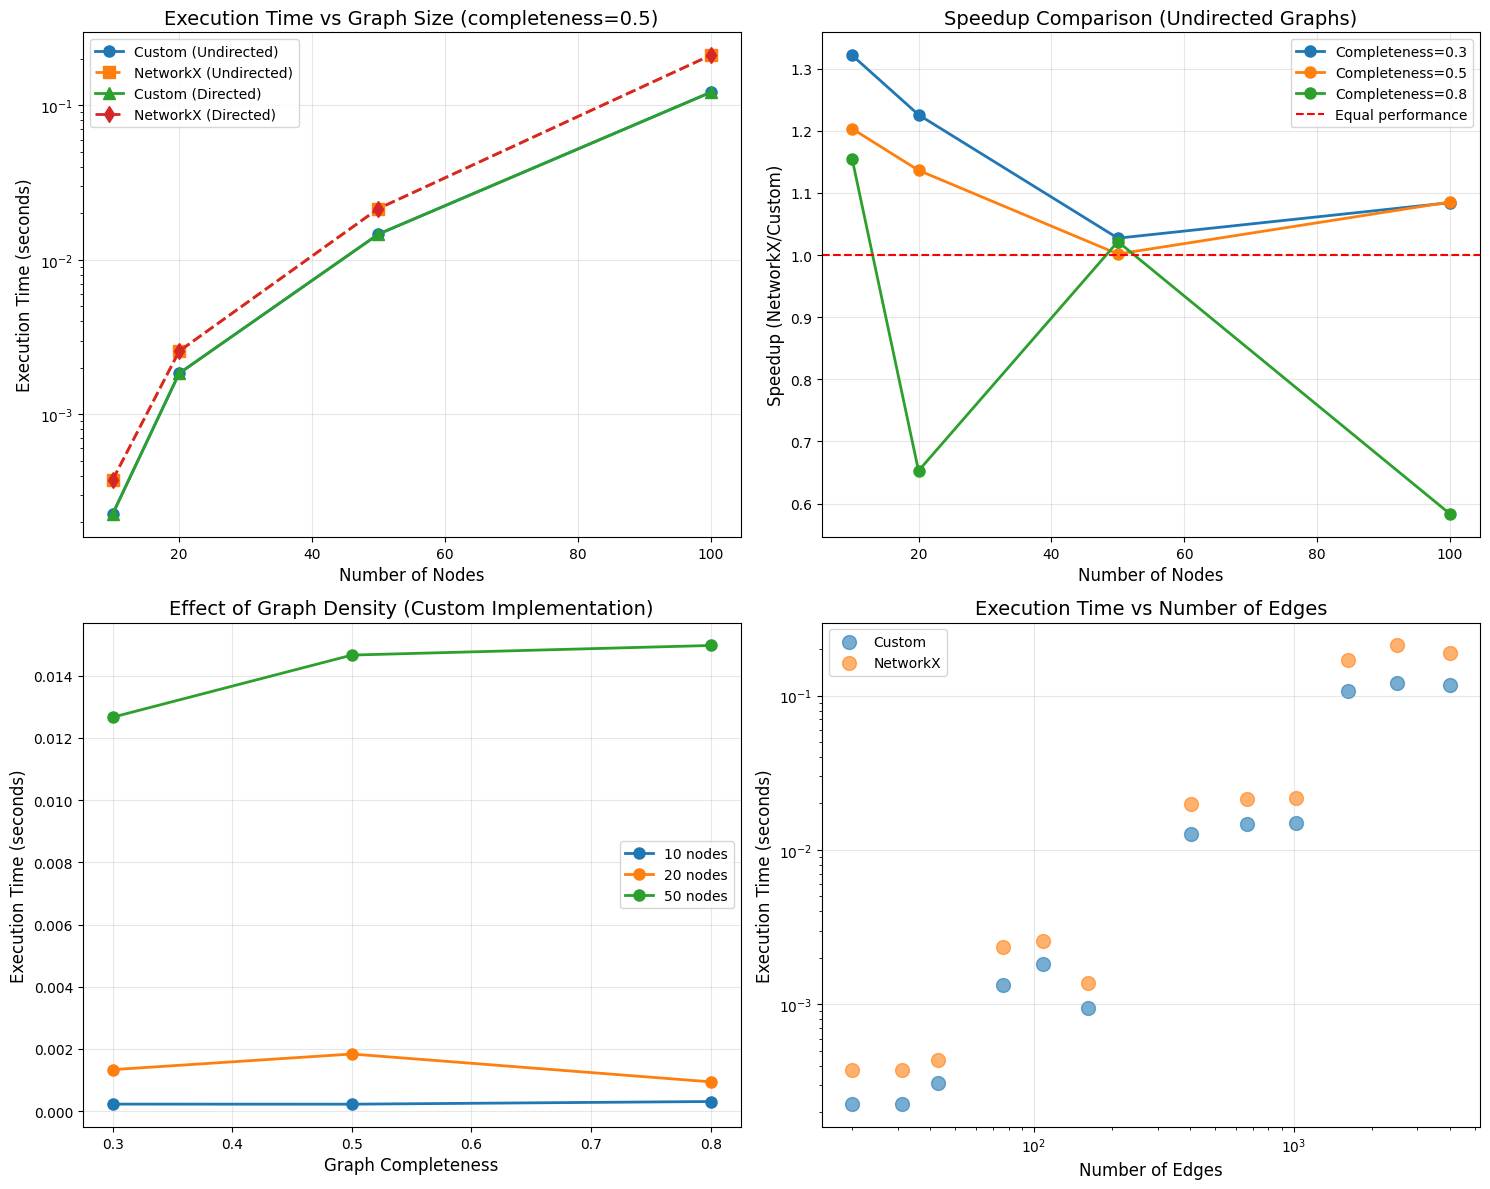

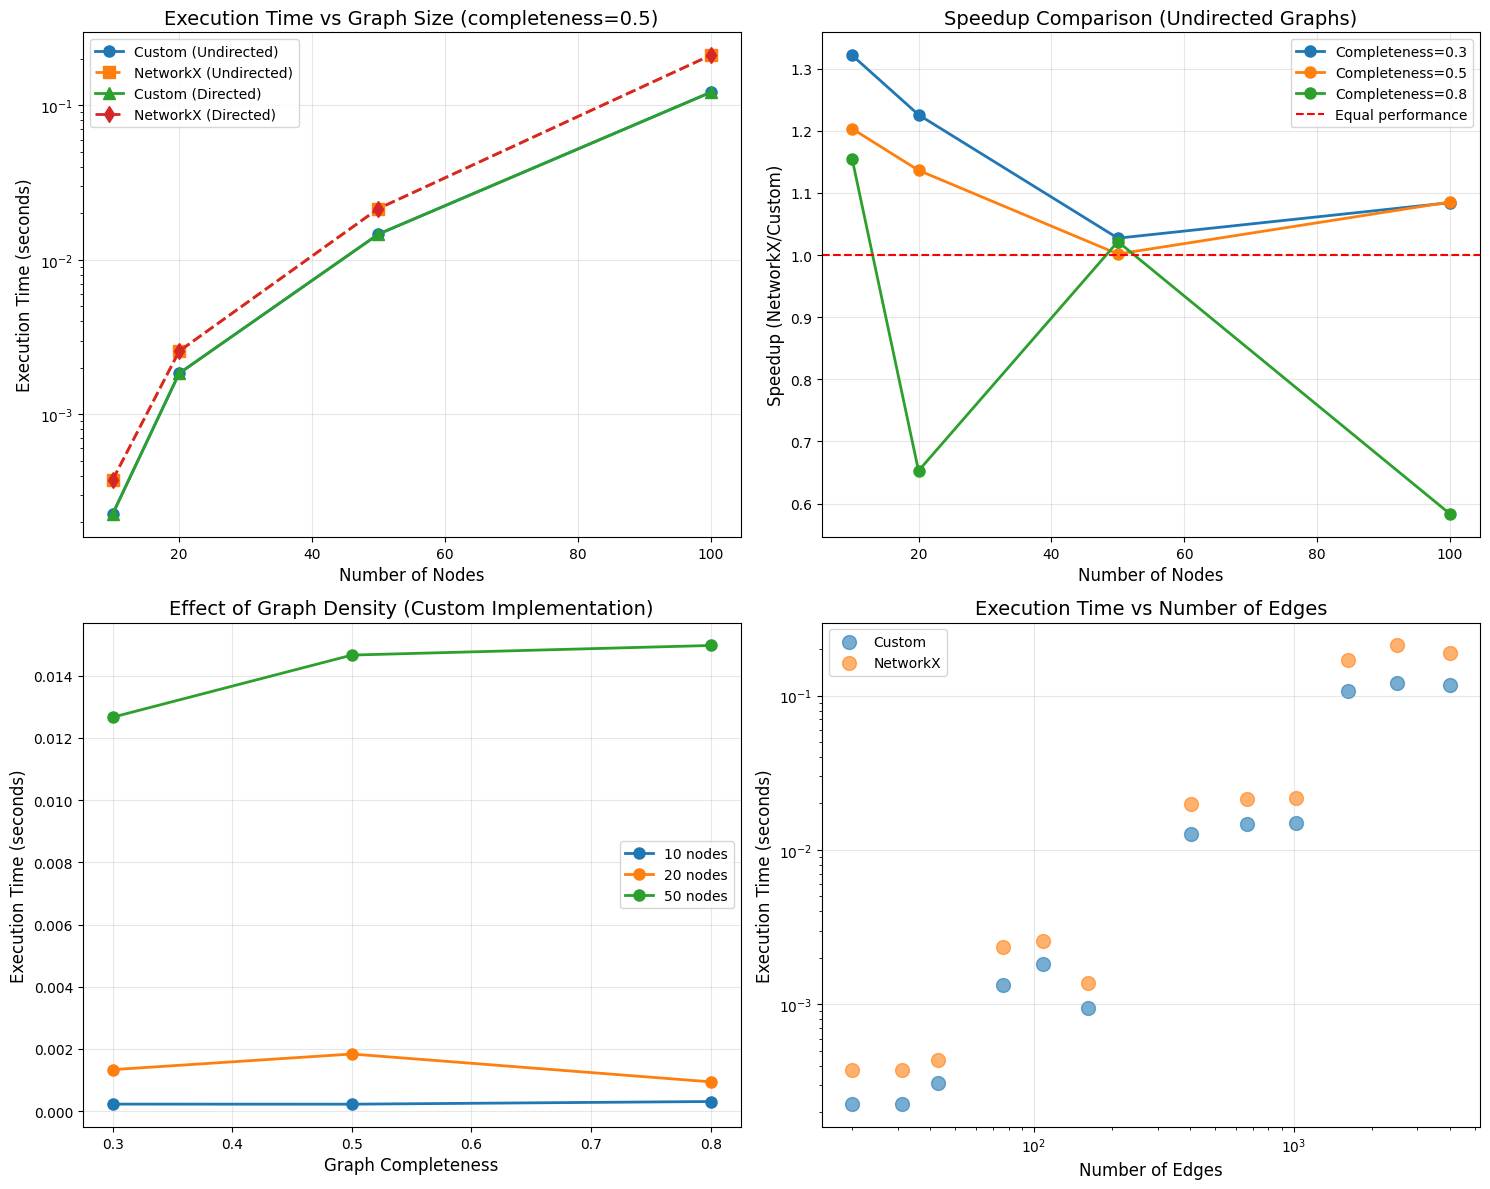

In [ ]:
def plot_results(results: list):
    """Plot performance comparison results"""
    df = pd.DataFrame(results)

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    ax1 = axes[0, 0]
    df_filtered = df[df['completeness'] == 0.5]

    undirected = df_filtered[df_filtered['directed']]
    directed = df_filtered[df_filtered['directed']]

    ax1.plot(undirected['num_nodes'], undirected['custom_min_time'],
             'o-', label='Custom (Undirected)', linewidth=2, markersize=8)
    ax1.plot(undirected['num_nodes'], undirected['nx_min_time'],
             's--', label='NetworkX (Undirected)', linewidth=2, markersize=8)
    ax1.plot(directed['num_nodes'], directed['custom_min_time'],
             '^-', label='Custom (Directed)', linewidth=2, markersize=8)
    ax1.plot(directed['num_nodes'], directed['nx_min_time'],
             'd--', label='NetworkX (Directed)', linewidth=2, markersize=8)

    ax1.set_xlabel('Number of Nodes', fontsize=12)
    ax1.set_ylabel('Execution Time (seconds)', fontsize=12)
    ax1.set_title('Execution Time vs Graph Size (completeness=0.5)', fontsize=14)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_yscale('log')


    ax2 = axes[0, 1]
    df_undirected = df[~df['directed']]

    for completeness in df['completeness'].unique():
        subset = df_undirected[df_undirected['completeness'] == completeness]
        ax2.plot(subset['num_nodes'], subset['speedup'],
                'o-', label=f'Completeness={completeness}', linewidth=2, markersize=8)

    ax2.axhline(y=1, color='r', linestyle='--', label='Equal performance')
    ax2.set_xlabel('Number of Nodes', fontsize=12)
    ax2.set_ylabel('Speedup (NetworkX/Custom)', fontsize=12)
    ax2.set_title('Speedup Comparison (Undirected Graphs)', fontsize=14)
    ax2.legend()
    ax2.grid(True, alpha=0.3)


    ax3 = axes[1, 0]

    for num_nodes in [10, 20, 50]:
        subset = df[(df['num_nodes'] == num_nodes) & (df['directed'])]
        ax3.plot(subset['completeness'], subset['custom_min_time'],
                'o-', label=f'{num_nodes} nodes', linewidth=2, markersize=8)

    ax3.set_xlabel('Graph Completeness', fontsize=12)
    ax3.set_ylabel('Execution Time (seconds)', fontsize=12)
    ax3.set_title('Effect of Graph Density (Custom Implementation)', fontsize=14)
    ax3.legend()
    ax3.grid(True, alpha=0.3)


    ax4 = axes[1, 1]

    df_undirected = df[df['directed']]
    ax4.scatter(df_undirected['num_edges'], df_undirected['custom_min_time'],
               alpha=0.6, s=100, label='Custom')
    ax4.scatter(df_undirected['num_edges'], df_undirected['nx_min_time'],
               alpha=0.6, s=100, label='NetworkX')

    ax4.set_xlabel('Number of Edges', fontsize=12)
    ax4.set_ylabel('Execution Time (seconds)', fontsize=12)
    ax4.set_title('Execution Time vs Number of Edges', fontsize=14)
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    ax4.set_yscale('log')
    ax4.set_xscale('log')

    plt.tight_layout()
    plt.show()

    return fig


plot_results(results)

#### Висновки по алгоритму Флойда-Воршалла

**Часова складність**: довели, що алгоритм Флойда–Воршелла має часову складність O(V³). Проведені експерименти демонструють кубічне зростання часу виконання зі збільшенням кількості вузлів графа.

**Продуктивність у порівнянні з NetworkX:**

* наша реалізація є швидшою за бібліотеку NetworkX;

* різниця в продуктивності залежить від структури графа;

* орієнтовані графи зазвичай демонструють більше прискорення, ніж неорієнтовані.

**Вплив щільності графа:**

* час виконання алгоритму визначається переважно кількістю вузлів, а не кількістю ребер;

* це підтверджує теоретичну складність O(V³), яка не залежить від числа ребер у графі.

**Обробка від’ємних ваг:**

* алгоритм коректно обробляє від’ємні ваги ребер;

* код добре знаходить від’ємні цикли за допомогою перевірки елементів головної діагоналі;

* за наявності від’ємних циклів обчислені відстані стають необмеженими.


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Useful explanations

### How to get list of edges for your algorithm


In [ ]:
edges = list(G.edges()) # by default G.edges are EdgesView class

In [ ]:
edges[:5]

[(0, 1), (0, 9), (1, 6), (1, 7), (1, 8)]

### To get edges with weights

In [ ]:
edges = list(G.edges(data=True))

In [ ]:
edges[:5]

[(0, 1, {'weight': 8}),
 (0, 9, {'weight': 6}),
 (1, 6, {'weight': 3}),
 (1, 7, {'weight': 8}),
 (1, 8, {'weight': 8})]

In [ ]:
nodes = list(G.nodes())
print(nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### Example on time measuring

Read more on this: https://realpython.com/python-timer/

Recall that you should measure times for 5, 10, 20, 50, 100, 200, 500 nodes 1000 times (and take mean of time taken for each node amount).

Then you should build the plot for two algorithms (x - data size, y - mean time of execution).

In [ ]:
import time
from tqdm import tqdm

In [ ]:
NUM_OF_ITERATIONS = 1000
time_taken = 0
for i in tqdm(range(NUM_OF_ITERATIONS)):

    # note that we should not measure time of graph creation
    G = gnp_random_connected_graph(100, 0.4, False)

    start = time.time()
    tree.minimum_spanning_tree(G, algorithm="prim")
    end = time.time()

    time_taken += end - start

time_taken / NUM_OF_ITERATIONS

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:02<00:00, 396.21it/s]


0.0007538454532623291

# Task 2. Decision Tree Classifier

In [ ]:
# scikit-learn package
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## General idea


You are expected to write a quite simple, yet good core logic of decision tree classifier class. Additionaly, you need to test your results and write down a report on what you've done, which principles used and explain the general process.

Hopefully, you have already learned what is decision tree classifier and how it work. For better understanding, and in case if something is still unclear for you, here are some useful links on basics of DTC:
- https://www.youtube.com/watch?v=ZVR2Way4nwQ
- https://towardsdatascience.com/decision-tree-classifier-explained-a-visual-guide-with-code-examples-for-beginners-7c863f06a71e
- https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial
- https://medium.com/data-science/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575

Also, for those interested to learn more about machine learning and particulary Desicion Trees - here is a great course on Coursera (you may be interested in the whole course or just this particular week):
- https://www.coursera.org/learn/advanced-learning-algorithms/home/week/4

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Dataset

You can use Iris dataset for this task. It is a very popular dataset for machine learning and data science. It contains 150 samples of 3 different species of Iris flowers (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.
Read more on this: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
https://en.wikipedia.org/wiki/Iris_flower_data_set

However, using more interesting and intricate datasets is much appreciated. You can use any dataset you want, but it should be a classification one. For example you can use breast cancer or wine datasets, which are also available in sklearn.datasets. Or you can use any other dataset you find interesting.

P.S. In case you are not sure if your dataset is suitable, feel free to ask assistants :).

In [ ]:
# Load dataset
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
iris.data.shape

(150, 4)

This means that we have 150 entries (samples, infos about a flower). The columns being: Sepal Length, Sepal Width, Petal Length and Petal Width(features). Let's look at first two entries:

In [ ]:
iris.data[0:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

### To undestand data little bit better, let's plot some features

Text(0, 0.5, 'Sepal width')

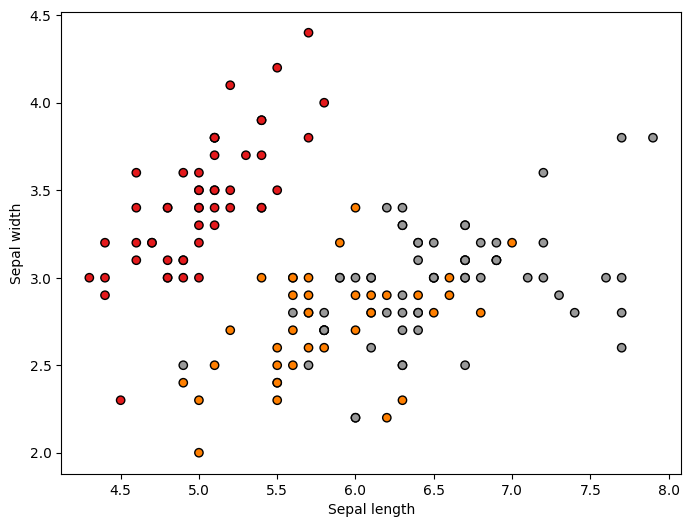

In [ ]:
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

From this we can clearly see, that even basing on those two parameters, we can clearly divide (classify) out data into several groups. For this, we will use decision tree classifier: https://scikit-learn.org/stable/modules/tree.html#tree


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Example of usage

**Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression**. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [ ]:
clf = DecisionTreeClassifier()

X, y = iris.data, iris.target
X.shape, y.shape

((150, 4), (150,))

### Train / test split

We train our model using training dataset and evaluate its performance basing on the test dataset. Reason to use two separate datasets is that our model learns its parameters from data, thus test set allows us to check its possibilities on completely new data.

In [ ]:
X, X_test, y, y_test = train_test_split(X, y, test_size= 0.20)
X_test.shape, y_test.shape

((30, 4), (30,))

### Model learning

It learns its parameters (where it should split data and for what threshold value) basing on the training dataset. It is done by minimizing some cost function (e.g. Gini impurity or entropy).

In [ ]:
clf = clf.fit(X, y)

### Visualization of produced tree

You do not need to understand this piece of code :)

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")

'iris.pdf'

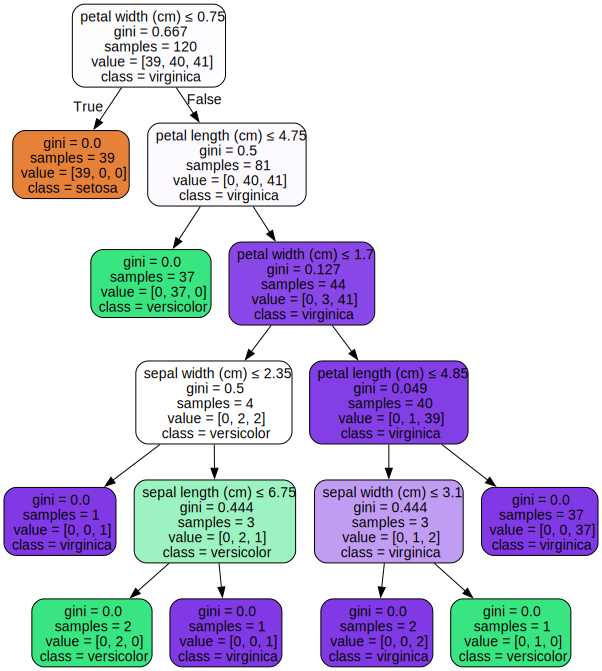

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=iris.feature_names,
                     class_names=iris.target_names,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Prediction step

Now we can use our model to predict which type has a flower, basing on its parameters.

This is conducted basically via traversing the tree that you can see above.

In [ ]:
predictions = clf.predict(X_test)

### We can also measure the accuracy of our model

In [ ]:
sum(predictions == y_test) / len(y_test)

np.float64(0.8)

To get clearer intuition about predicion, let's look at those X, that should be labeled to some flower

In [ ]:
y_test

array([2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 0, 2, 1, 0, 1, 0, 0,
       1, 2, 1, 0, 1, 1, 0, 2])


Here you can traverse the tree above by yourself and make sure that prediction works

In [ ]:
X_test[1]

array([4.9, 3.1, 1.5, 0.2])

In [ ]:
clf.predict([X_test[1]])

array([0])

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Decision tree classifier (2 point)

###  Gini impurity


Decision trees use the concept of Gini impurity to describe how “pure” a node is. A node is pure (G = 0) if all its samples belong to the same class, while a node with many samples from many different classes will have a Gini closer to 1.

$G = 1 - \sum_{k=1}^{n}p_{k}^2$

For example, if a node contains five samples, with two belonging to the first class (first flower), two of class 2, one of class 3 and none of class 4, then

$G = 1 - (\frac{2}{5})^2 - (\frac{2}{5})^2 - (\frac{1}{5})^2 = 0.64$


### Your implementation

> We recommend using additional functions in `DecisionTreeClassifier` class, to make the implementation process easier.

In [ ]:

class Node:
    def __init__(self, X: npt.NDArray, y: npt.NDArray):
        """
        :param X: numpy array of form [[feature1,feature2, ... featureN], ...] (i.e. [[1.5, 5.4, 3.2, 9.8] , ...] for case with iris d.s.)
        :param y: numpy array of from [class1, class2, ...] (i.e. [0,1,1,2,1,0,...] for case with iris d.s.)
        """

        self.X = X
        self.y = y
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

In [ ]:
class DecisionTreeClassifier:
    def __init__(self, max_depth: int) -> None:
        self.max_depth = max_depth
        self.tree = None
        self.number_of_classes = None


    def fit(self, X: npt.NDArray, y: npt.NDArray) -> None:
        """
        Basically, function that performs all the training (building of a tree)
        We recommend to use it as a wrapper of recursive building function
        """
        self.number_of_classes = np.unique(y).size



    def predict(self, X_test: npt.NDArray) -> list:
        """
        Traverse the tree while there is a child
        and return the predicted class for it
        """
        pass

In [ ]:

def evaluate(X_test: list[list], y_test: list) -> float:
    """
    Returns accuracy of the model (ratio of right guesses to the number of samples)
    """
    pass

#### Additional point (+0.5)

Use Laplace smoothing, explain what is the point of using it